In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    'dataset/train',      # مسار المجلد الرئيسي للصور
    image_size=(150, 150),# حجم الصور بعد إعادة التحجيم
    batch_size=16,        # عدد الصور في كل دفعة تدريب
    shuffle=True          # ترتيب الصور عشوائيًا
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    'dataset/test',
    image_size=(150, 150),
    batch_size=16,        
    shuffle=True          

)


Found 1600 files belonging to 2 classes.
Found 376 files belonging to 2 classes.


# getting the data set ( images ) :
- here we get the images from the dataset and groping it in gropes of 16 images with (**batch_size**) , and resize each one to size (150*150) to use it with (**image_size**) , and Arrange them randomly with (**shuffle**)

In [3]:
print(train_ds.class_names) # to get the classes names 

['not_pizza', 'pizza']


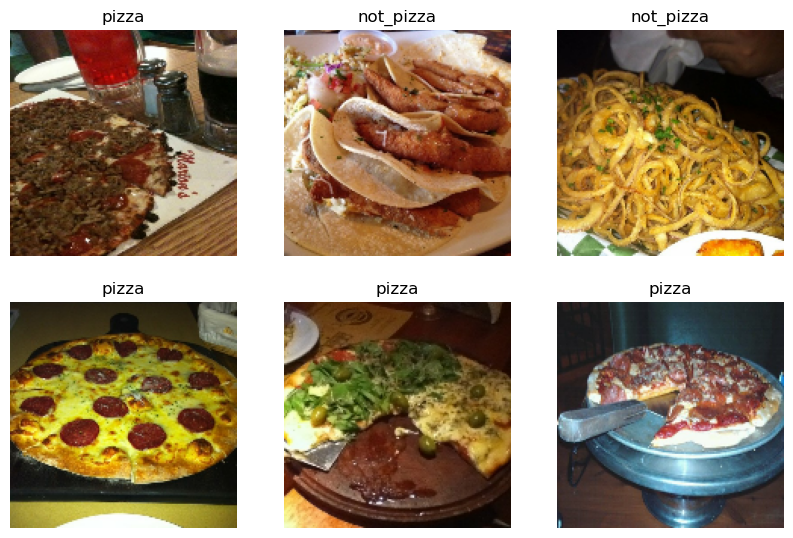

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

In [5]:
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

# Image Normalization :
- there we change the RGB values in the inmages from the range (0-255) to range (0-1) to facilitating the training process 

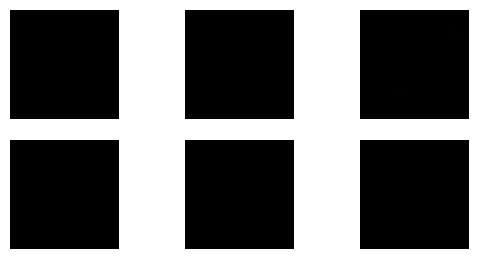

In [10]:
def display_images(ds,num):
    for images, labels in ds.take(1):
        for i in range(num):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            #plt.title(ds.class_names[labels[i]])
            plt.axis("off")
display_images(train_ds,6)